# Brain Stroke Prediction Model

### Introduction 

Stroke is a medical disorder in which the blood arteries in the brain are ruptured, causing damage to the brain. When the supply of blood and other nutrients to the brain is interrupted, symptoms might develop.

* The stroke rate in India is much higher than in other developing countries. A small percentage of stroke patients die immediately from the initial trauma. 

* Some of the leading causes that eventually lead to death may be initial ischemic infarction, recurrent ischemic stroke and other vascular or nonvascular causes.

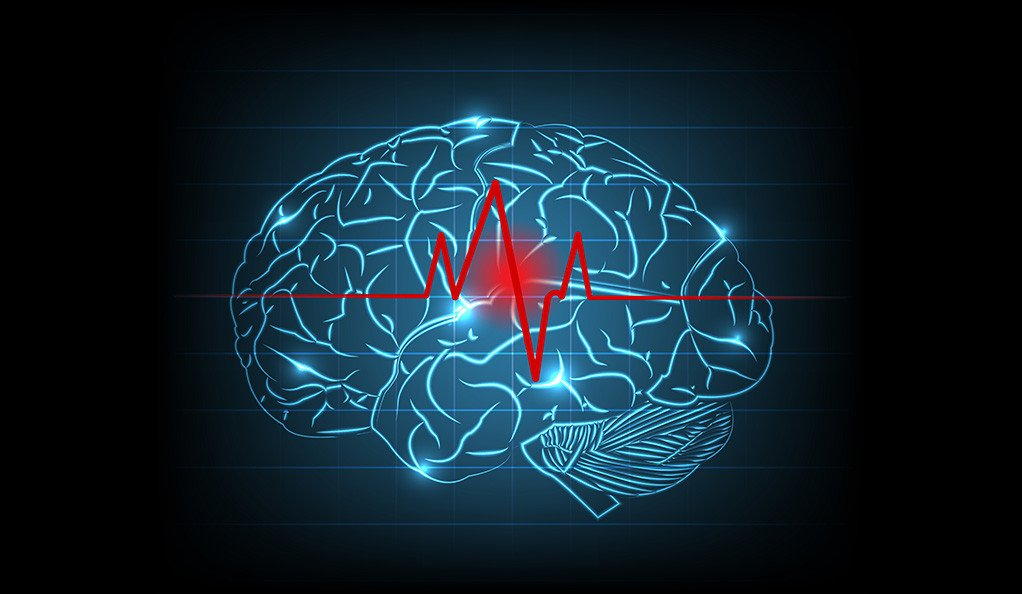

### Table of Contents

1. Import Libraries
2. Reading and Checking the Dataset
3. Exploratory Data Analysis

# 1. Import Libraries

In [1]:
!pip install dataprep

     ---------------------------------------- 9.9/9.9 MB 19.7 MB/s eta 0:00:00
     -------------------------------------- 133.6/133.6 kB 7.7 MB/s eta 0:00:00
     ------------------------------------- 323.5/323.5 kB 19.6 MB/s eta 0:00:00
     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 26.0 MB/s eta 0:00:00
     ------------------------------------- 273.3/273.3 kB 17.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.7 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 33.1 MB/s eta 0:00:00
     -------------------------------------- 158.6/158.6 kB 9.3 MB/s eta 0:00:00
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 101.5/101.5 kB 5.7 MB/s eta 0:00:00
     -----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

In [3]:
data1=pd.read_csv('full_data.csv')
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
data1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
print(data1.duplicated().value_counts(),'\n')
print('Total Sum',data1.duplicated().sum())

False    4981
dtype: int64 

Total Sum 0


In [7]:
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data1.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data1.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [10]:
data1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
dt_clm = data1[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type','smoking_status', 'stroke']]

In [27]:
for i in dt_clm.columns:
    print('->',dt_clm[i].unique())

-> ['Male' 'Female']
-> [0 1]
-> [1 0]
-> ['Yes' 'No']
-> ['Private' 'Self-employed' 'Govt_job' 'children']
-> ['Urban' 'Rural']
-> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
-> [1 0]


In [29]:
for i in dt_clm.columns:
    print(dt_clm[i].value_counts())
    print('-------------------------------------')

Female    2907
Male      2074
Name: gender, dtype: int64
-------------------------------------
0    4502
1     479
Name: hypertension, dtype: int64
-------------------------------------
0    4706
1     275
Name: heart_disease, dtype: int64
-------------------------------------
Yes    3280
No     1701
Name: ever_married, dtype: int64
-------------------------------------
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
-------------------------------------
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
-------------------------------------
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
-------------------------------------
0    4733
1     248
Name: stroke, dtype: int64
-------------------------------------


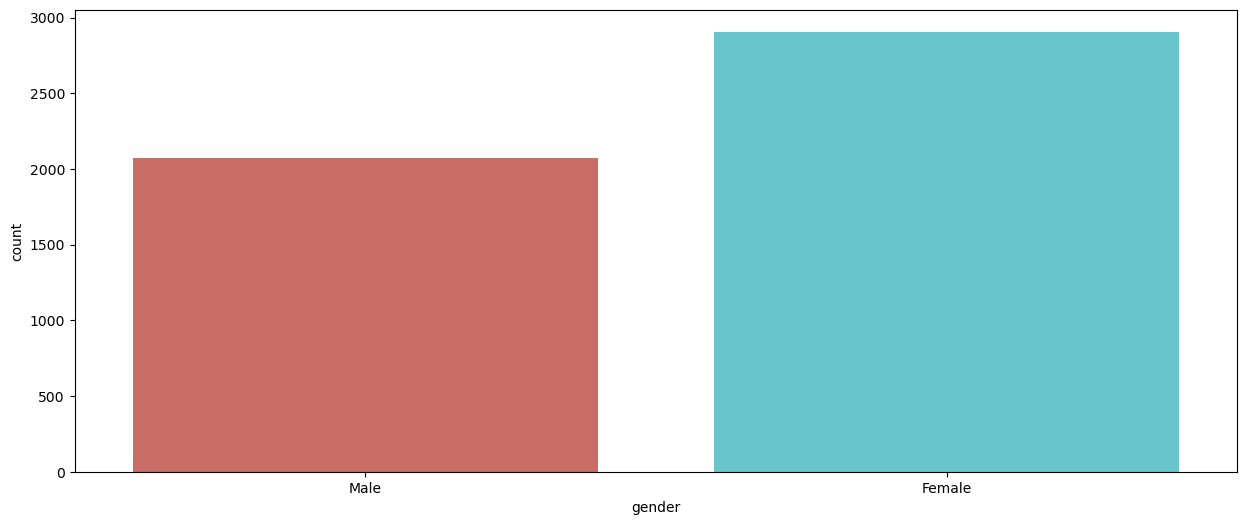

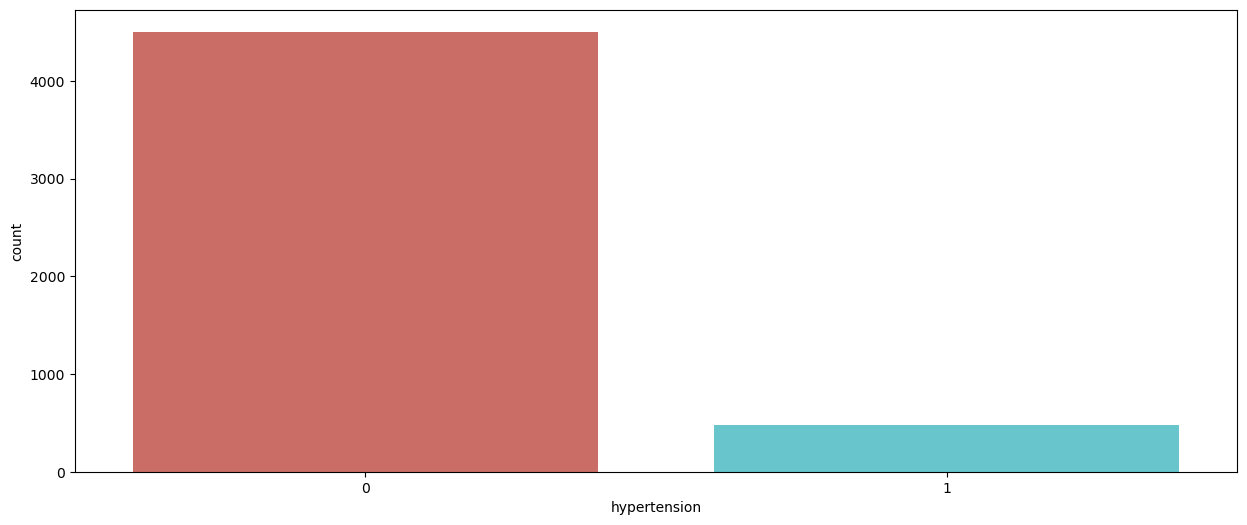

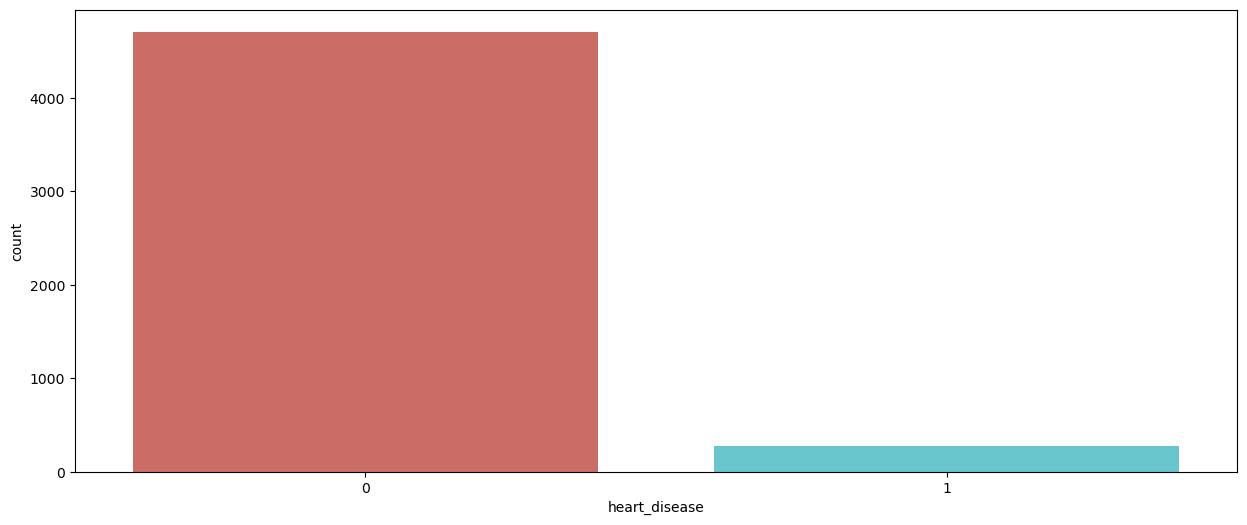

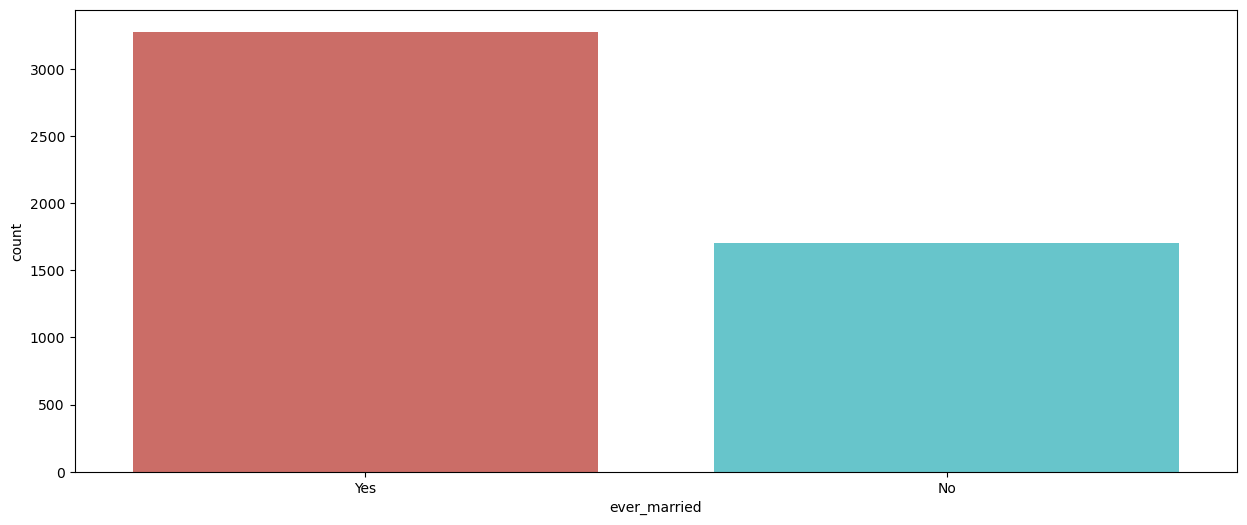

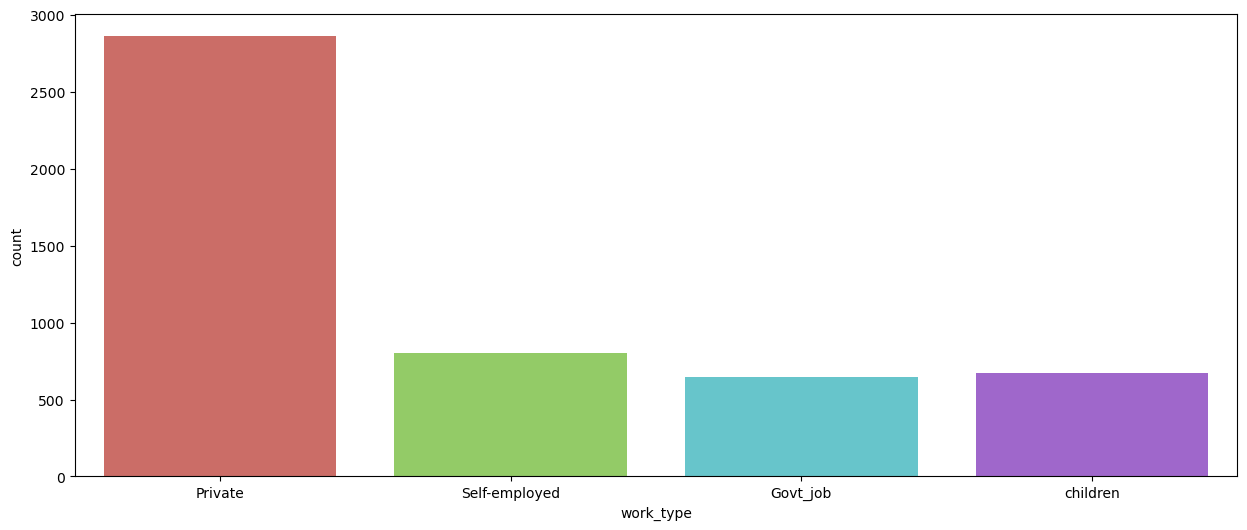

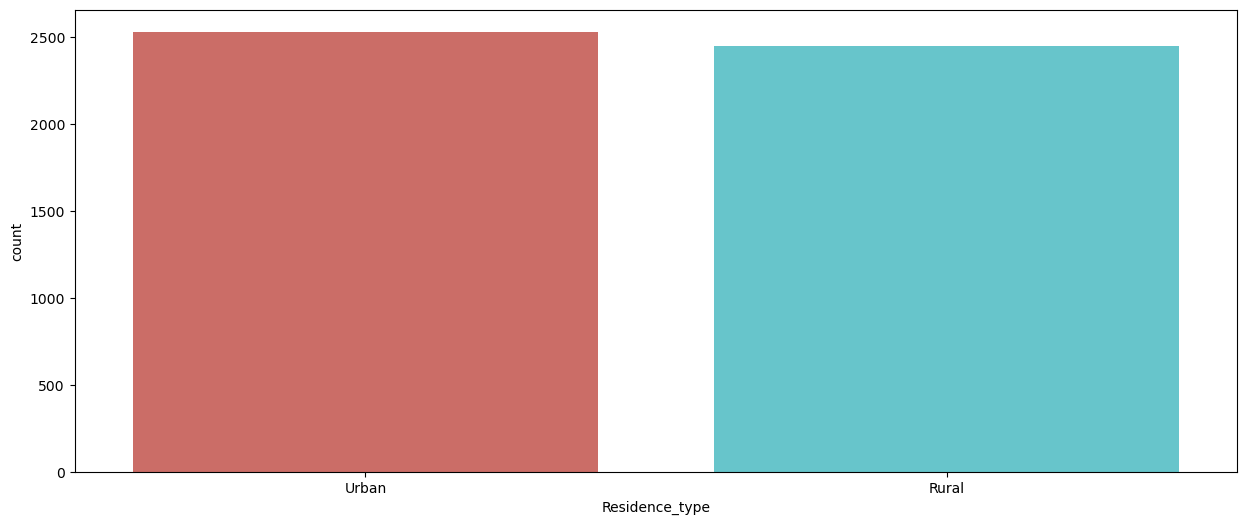

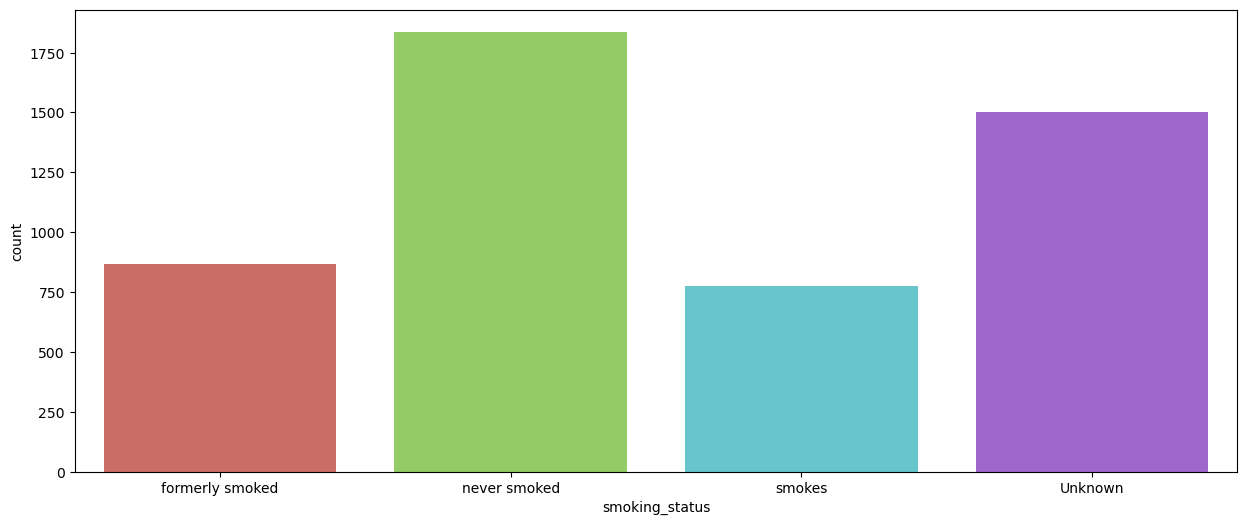

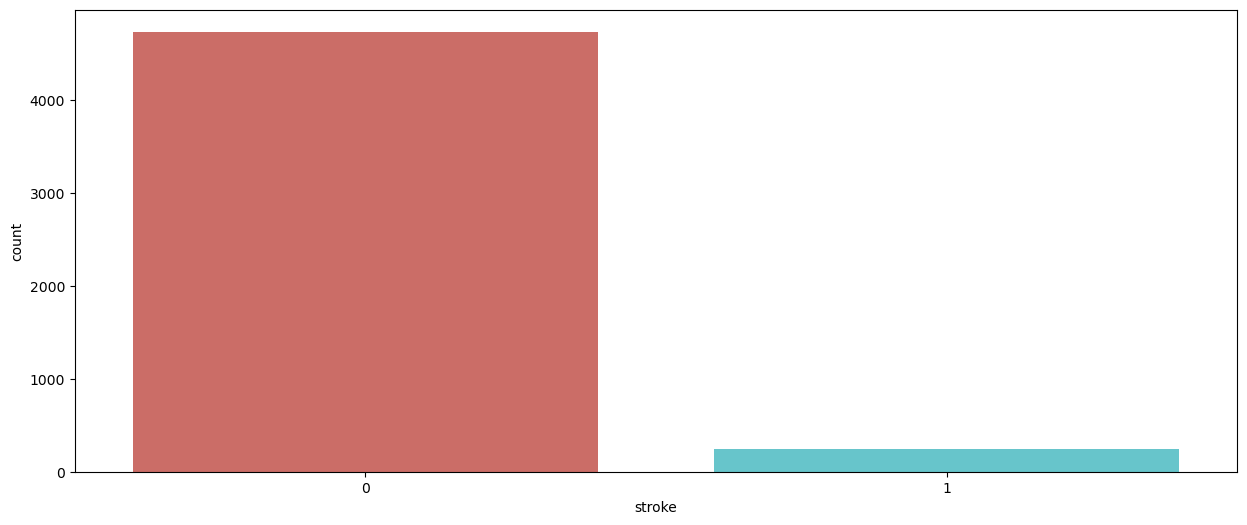

In [39]:
for i in dt_clm.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(dt_clm[i],data=dt_clm,palette='hls')
    plt.show()

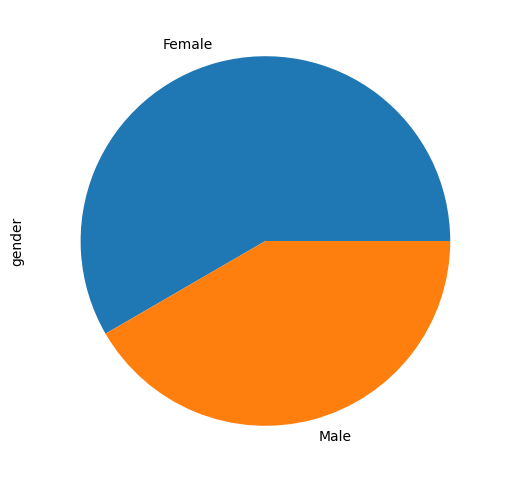

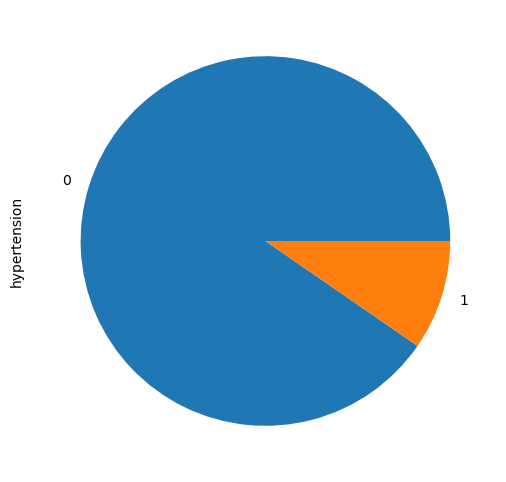

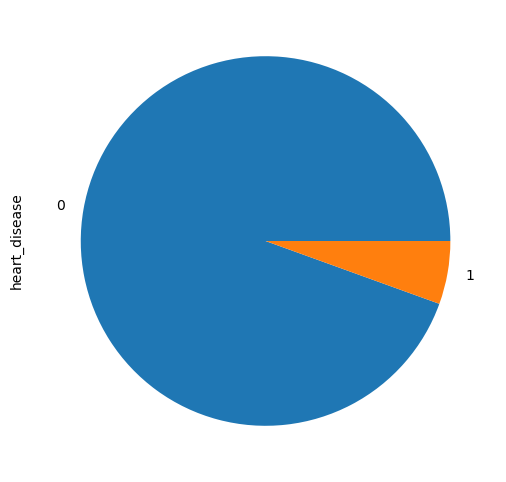

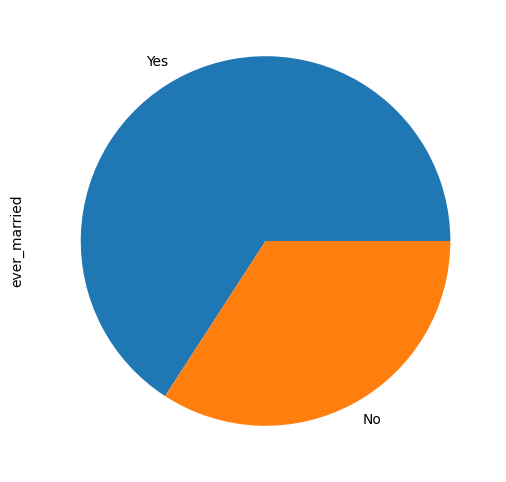

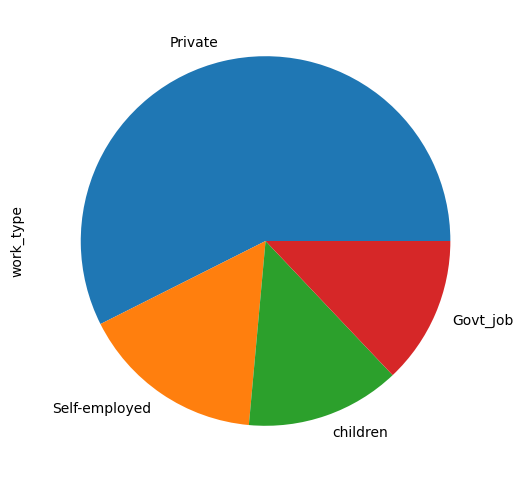

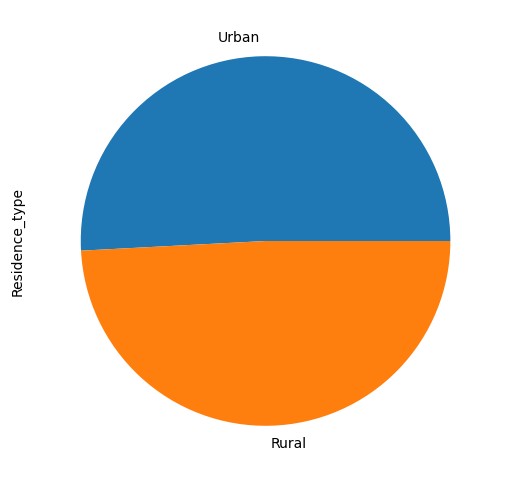

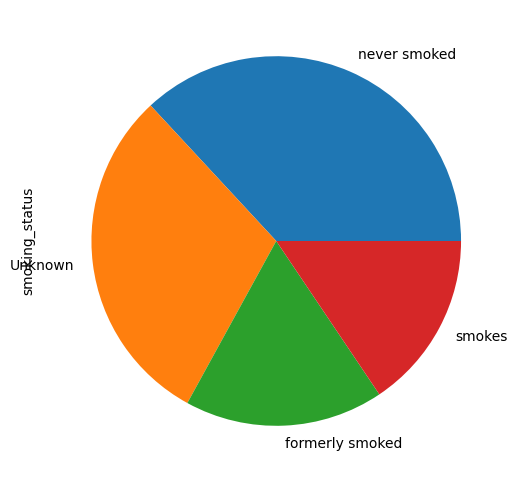

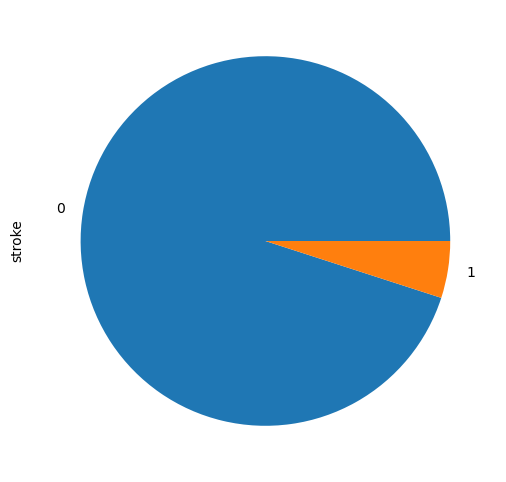

In [47]:
for i in dt_clm.columns:
    plt.figure(figsize=(15,6))
    dt_clm[i].value_counts().plot(kind='pie')
    plt.show()